<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

As the Data scientist with the  bank - we need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* IsActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
    - 0 = No ( Customer did not leave the bank )
    - 1 = Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==2.0.3 imbalanced-learn==0.10.1 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 106.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 122.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 117.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 76.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 120.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.

**Note:** After running the above cell, please restart the notebook kernel/runtime (depending on whether you're using Jupyter Notebook or Google Colab) and then sequentially run all cells from the one below.

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split

# library to import to standardize the data
from sklearn.preprocessing import StandardScaler, LabelEncoder

# importing different functions to build models
import tensorflow as tf
from tensorflow import keras
from keras import backend
from keras.models import Sequential
from keras.layers import Dense, Dropout

# importing SMOTE
from imblearn.over_sampling import SMOTE

# importing metrics
from sklearn.metrics import confusion_matrix,roc_curve,classification_report,recall_score

import random

# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# uncomment and run the following lines in case Colab is being used
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("bank-1.csv")

In [ ]:
# creating copy of the data to avoid any changes to original data
ds = data.copy()

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
# view the first 5 rows of the data
ds.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
# view the last 5 rows of the data
ds.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Understand the shape of the dataset

In [ ]:
# Checking the number of rows and columns in the training data
ds.shape

(10000, 14)

In [ ]:
# printing the shape of the data with the rows and columns
print(f"The dataset has {ds.shape[0]} rows and {ds.shape[1]} columns.")

The dataset has 10000 rows and 14 columns.


### Observation:
* The dataset has 10000 rows and 14 columns.

### Check the data types of the columns for the dataset

In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Observation:
* There are 11 features identified as numerical, while 3 are identified as categorical.
* However, some columns are identifiers (personal or unique), index columns or binary classification.
  * Unique Identifier: `CustomerId`
  * Other Identifier: `Surname`
  * Index column: `RowNumber` - this will be dropped
  * Binary Classification: `HasCrCard`, `IsActiveMember`, `Exited`
* The Identifiers are likely to be dropped as they are likely not going to contribute to the prediction - whether a customer will leave the bank or not in the next 6 months.
* We will determine if `CreditScore` should be treated as a group, classifier, or leave as numerical variable.


### Checking the Statistical Summary

In [ ]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Checking for Missing Values

In [ ]:
# check for missing values in the data
ds.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


### Observation:

* There are no missing values in the datatset.

### Checking for unique values for each of the column

In [ ]:
ds.nunique()

,0
RowNumber,10000
CustomerId,10000
Surname,2932
CreditScore,460
Geography,3
Gender,2
Age,70
Tenure,11
Balance,6382
NumOfProducts,4


### Observations:
* As indicated earlier, `RowNumber` and `CustomerId` are both index and unique identifier columns. These will be dropped.
* `Surname` will also be dropped.
* Also, the binary classifier column not mentioned earlier is `Gender`. The rest are `HasCrCard`, `IsActiveMember`, `Exited`.
* The bank offers 4 product types.
* There are 3 geographical locations.

In [ ]:
#RowNumber , CustomerId and Surname are unique hence dropping it
ds = ds.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
# Checking the dataset
ds.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Exploratory Data Analysis

### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on CreditScore

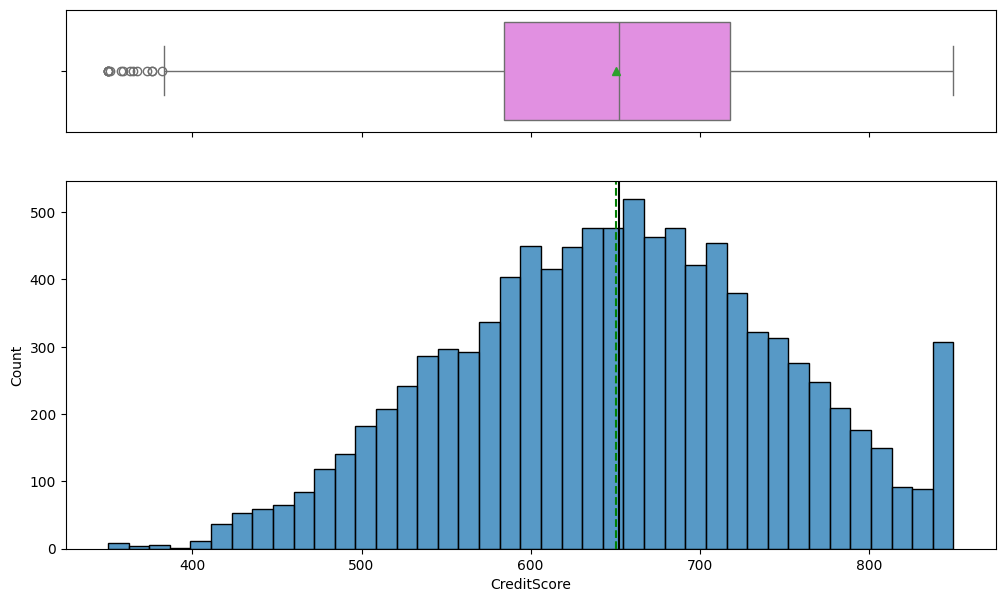

In [ ]:
histogram_boxplot(ds,'CreditScore')

### Observation:
* The majority of customers fall into moderate to good credit score brackets
* The histogram displays a roughly bell-shaped (normal-like) distribution, centered around 650–660
* The are several left-side outliers (below ~400), with no significant outliers on the upper end.
* The outliers with low credit scores (< 400) could warrant closer inspection in churn prediction.

#### Observations on Age

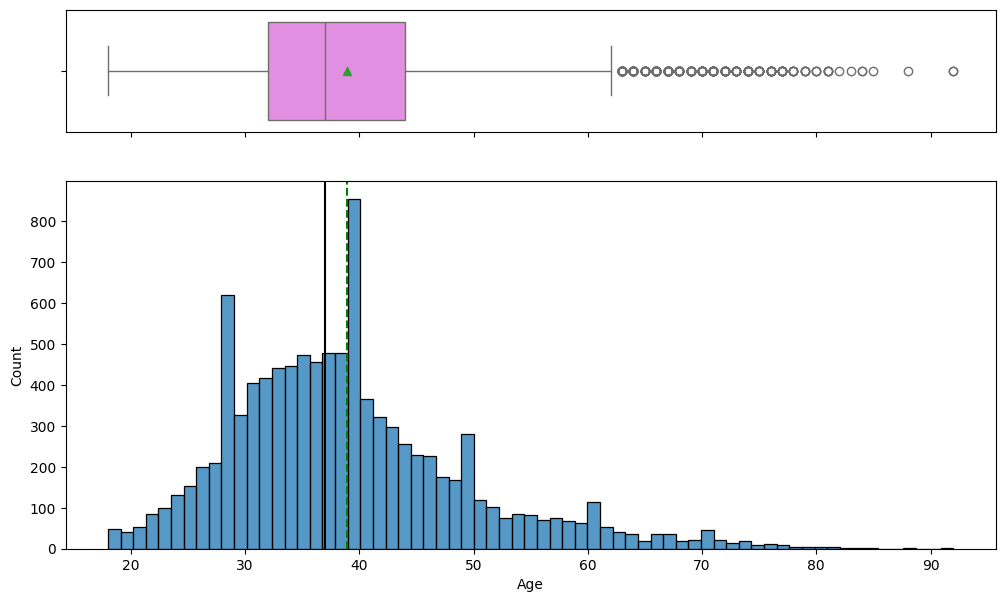

In [ ]:
histogram_boxplot(ds, 'Age')

### Observation:
* The distribution is right-skewed.
* We have some outliers
* The mean age is Median age ≈ 37; mean slightly higher (~39), indicating a light skew.
* The bank has a lot of young customers. Majority of customers are aged 30–45, with a sharp drop after age 60

#### Observations on Balance

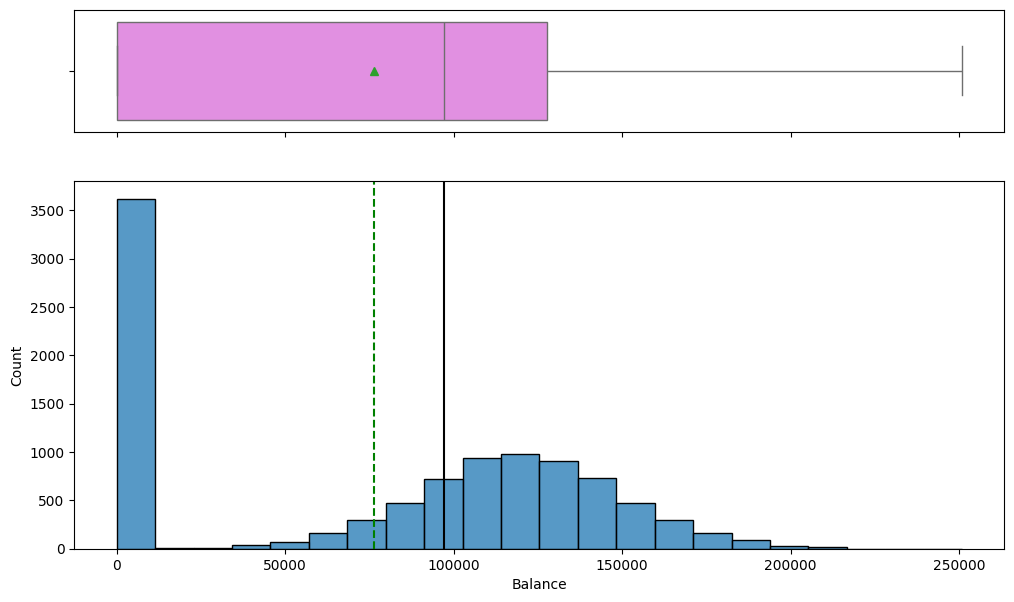

In [ ]:
histogram_boxplot(ds, 'Balance')

### Observation:
* Distribution is highly right-skewed due to the large number of zeros.
* About 3600 customers have 0 zero balance. suggesting a large inactive or dormant segment.
* No major outliers.
* Zero balance could be an early indicator of churn or disengagement.

#### Observations on Estimated Salary

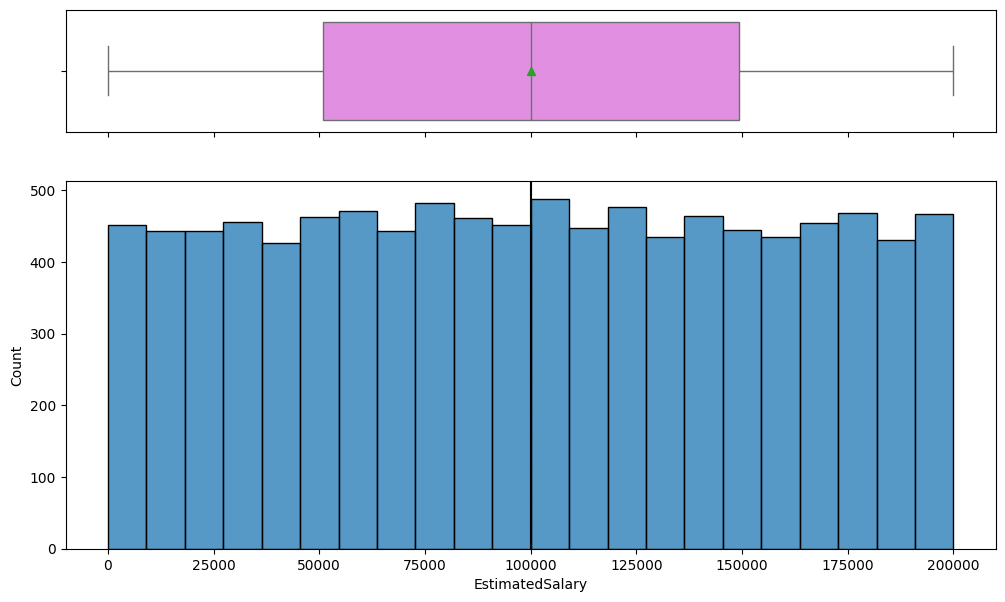

In [ ]:
histogram_boxplot(ds, 'EstimatedSalary')

### Observation:
* Very balanced and evenly distributed.
* Ranges from 11 USD to 200,000 USD
* The median salary is 100,000 USD
* Salary alone may not be a strong predictor due to its flat distribution.

#### Observations on Exited

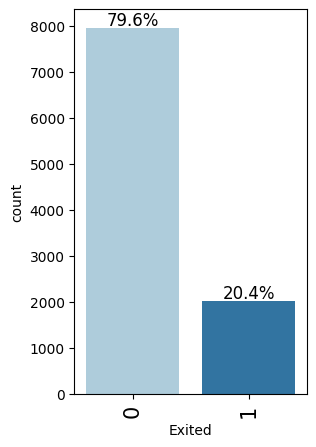

In [ ]:
labeled_barplot(ds, "Exited", perc=True)

### Observation:
* This is an imbalanced dataset
* There are 79.6% customers that are still with the bank, while 20.4% has churned. Suggesting 1 in 5 customers have churned.
* 2037 members have churned.
* Not a huge imbalance but we may have to consider F1-score as eval  metrics.

#### Observations on Geography

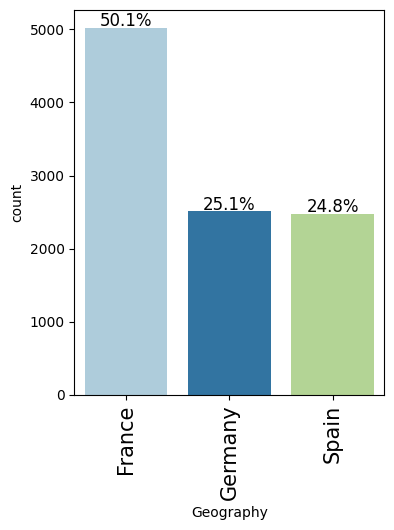

In [ ]:
labeled_barplot(ds,'Geography', perc = True)

### Observation:
* The bank operates in 3 different countries - France, Germany, and Spain.
* Half of the customer base are in France (50.1%). The remaining share of operation is approximately evenly distributed between Germany (25.1%) and Spain (24.8%).

#### Observations on Gender

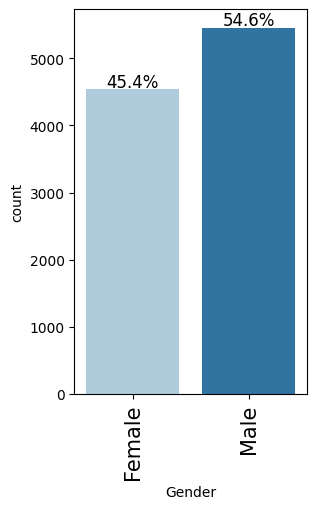

In [ ]:
labeled_barplot(ds, 'Gender', perc = True)

### Observation:
* The dataset is well distributed across gender.
* Male has larger percentage of the customer base at 54.6%, and Female is at 45.4%.

#### Observations on Tenure

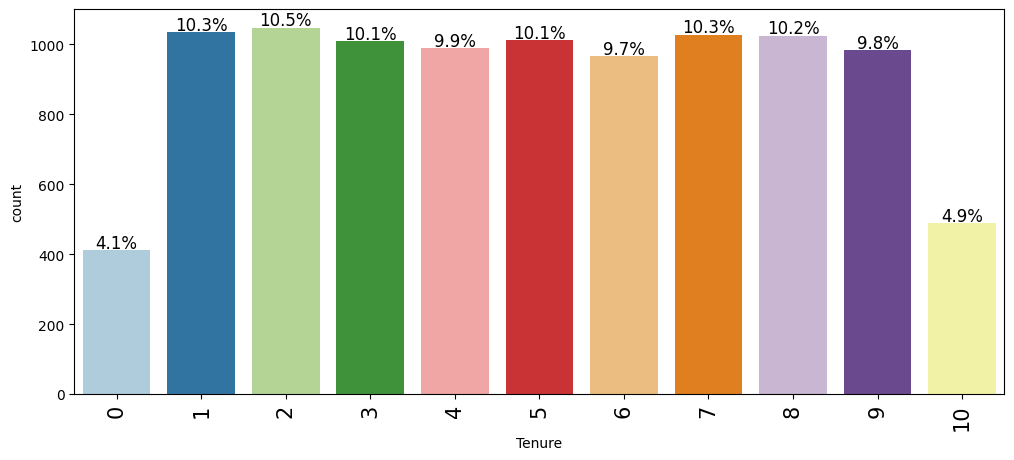

In [ ]:
labeled_barplot(ds, 'Tenure', perc = True)

### Observation:
* Evenly spread across 1 to 9 years (all around 9–11%).
* Year 0 (New Customers): 4.1%. Year 10 (the oldest customers): 4.9%.
* Most customers are mid-tenure (1–9 years). Edge cases (0 and 10 years) are fewer.

#### Observations on Number of Products

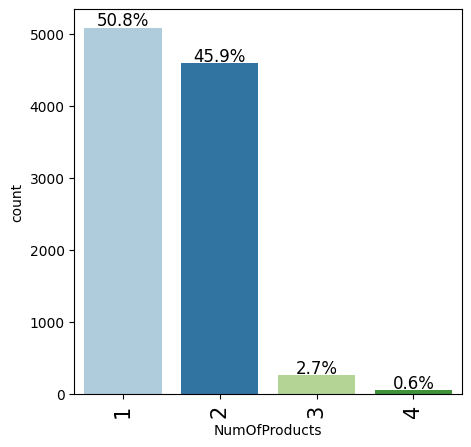

In [ ]:
labeled_barplot(ds, 'NumOfProducts', perc = True)

### Observation:
* Nearly all customers use 1 - 2 products. Higher product counts are rare.
* 1 product: 50.8%
* 2 products: 45.9%
* 3 products: 2.7%
* 4 products: 0.6%

#### Observations on Has Credit Card

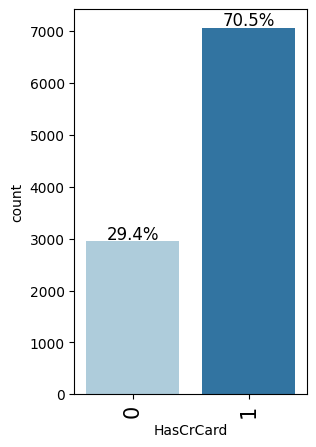

In [ ]:
labeled_barplot(ds,'HasCrCard', perc = True)

### Observation:
* Majority of the customers have a credit card account.
* Customers with credit card: 70.5%
* Customers with no credit card: 29.4%

#### Observations on Is Active Member

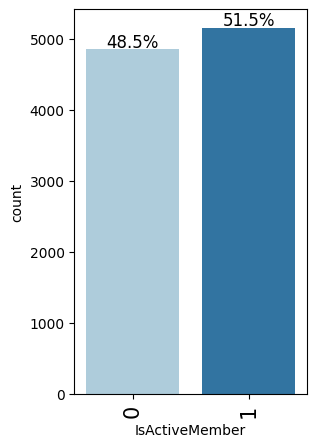

In [ ]:
labeled_barplot(ds, 'IsActiveMember', perc = True)

### Observation:
* The active/inactive ratio is fairly balanced.
* Active members: 51.5%
* Inactive members: 48.5%

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Correlation plot

In [ ]:
# defining the list of numerical columns
cols_list = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

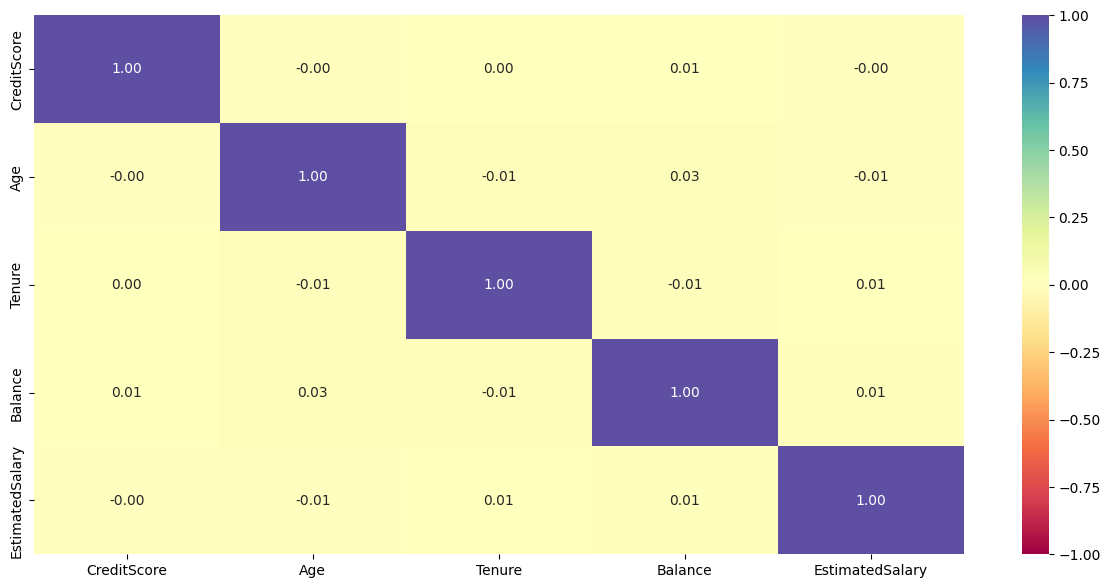

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(ds[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Observation:
* There is no observed correlation among these variables - Credit Score, Age, Tenure, Balance, and Estimated Salary.
* This is could be beneficial for neural networks. it reduces the risk of multicollinearity.
* It also means that each feature might contribute independently to predicting churn, so it’s worth keeping them all for modeling.

#### Exited Vs Geography

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


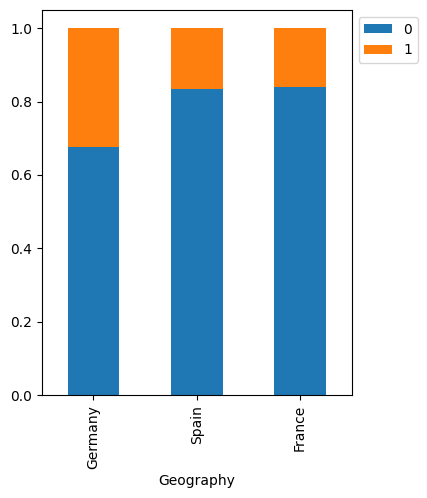

In [ ]:
stacked_barplot(ds, "Geography", "Exited" )

### Observation:

* Germany has the highest churn rate (32.44%).
* France has the lowest churn rate (16.15%), even though it has over 50% of the customer base. The churn rate is similar to Spain's (16.67%).
* Geography plays a significant role in churn behavior, with German customers showing a much higher exit rate.

#### Exited Vs Gender

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


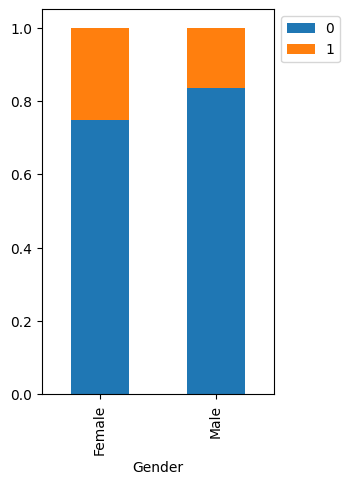

In [ ]:
stacked_barplot(ds,'Gender', 'Exited')                   ## Code to plot stacked barplot for Exited and Gender

### Observation:
* Females churn more than males.
* The female is 25.07% compared to 16.45% churn rate of male customers.
* Gender is a potential differentiating factor.

#### Exited Vs Has Credit Card

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


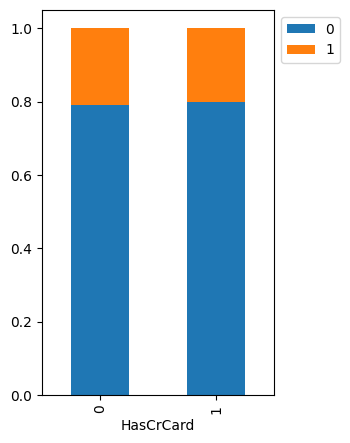

In [ ]:
stacked_barplot(ds,'HasCrCard', 'Exited')

### Observation:
* Very little difference between those with and without a credit card.
* Credit card offering is not a strong predictor of churn on its own.

#### Exited Vs Is active member

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


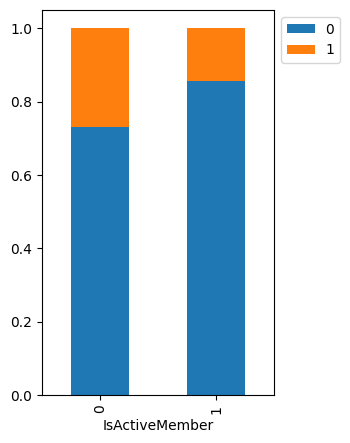

In [ ]:
stacked_barplot(ds,'IsActiveMember', 'Exited')

### Observation:
* Inactive members (26.85%) churn more than active members (14.26%). This is expected.
* Inactive members, 1302, are also 63.9% of total churned members.
* Activity level is a good indicator of retention.

#### Exited Vs Credit Score

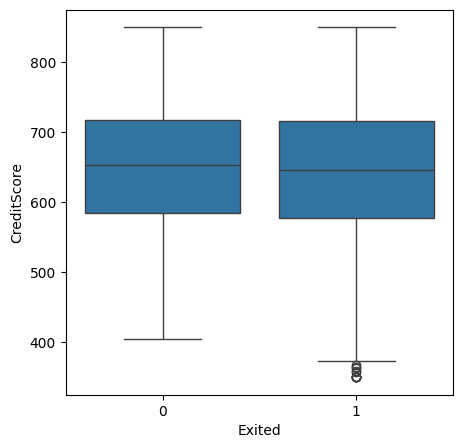

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='CreditScore',x='Exited',data=ds)
plt.show()

### Observation:
* Median credit scores are similar.
* Slight tendency for churners to have slightly lower scores, but not very strong.

#### Exited Vs Age

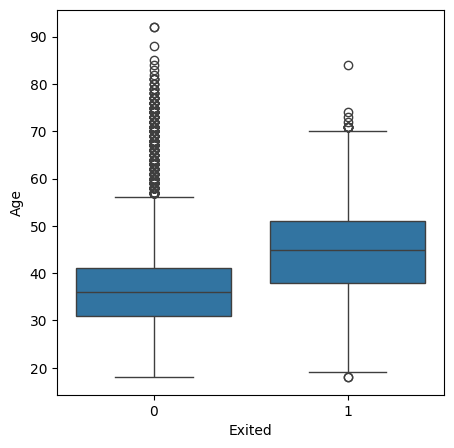

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',x='Exited',data=ds)
plt.show()

### Observation:
* The median age of churned customers is higher than customers still with the bank. Suggesting Older customers churn more.
* This is also exhibited in the age group of outliers (>55 years) in retained customers.

#### Exited Vs Tenure

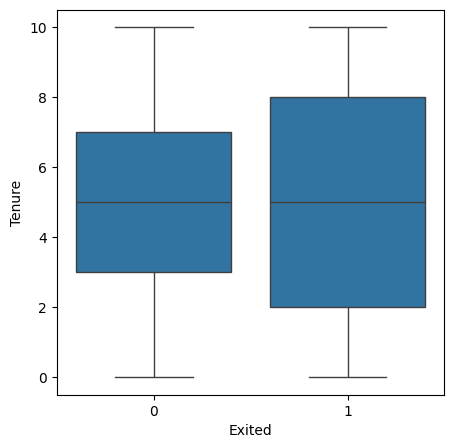

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Tenure',x='Exited',data=ds)

### Observation:
* No strong trend; tenure distribution is similar for both groups.
* May need to be used in interaction with other features.

#### Exited Vs Balance

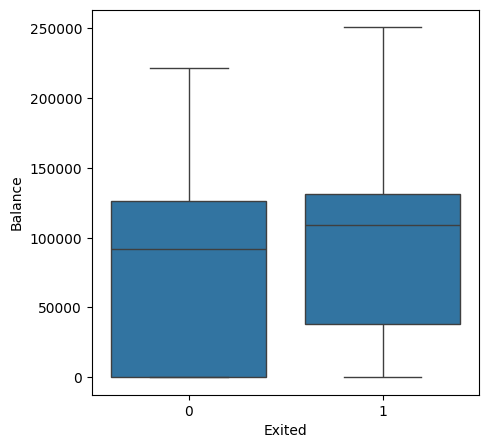

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Balance',x='Exited',data=ds)

### Observation:
* Churners have a higher median balance.
* Customers with higher balances may be leaving - counterintuitive and worth deeper analysis.

#### Exited Vs Number of Products

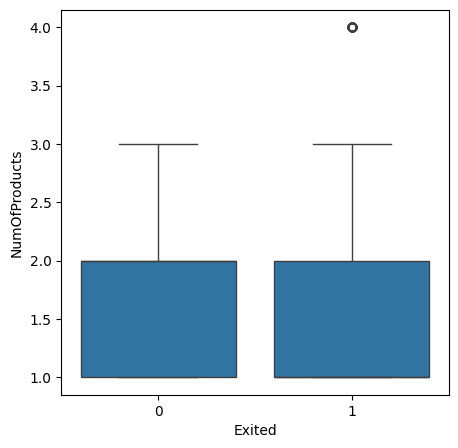

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='NumOfProducts',x='Exited',data=ds)
plt.show()

### Observation:
* Nearly all customers have 1 - 2 products regardless of churn.
* Not a very telling variable unless used with engineered interactions.

#### Exited Vs Estimated Salary

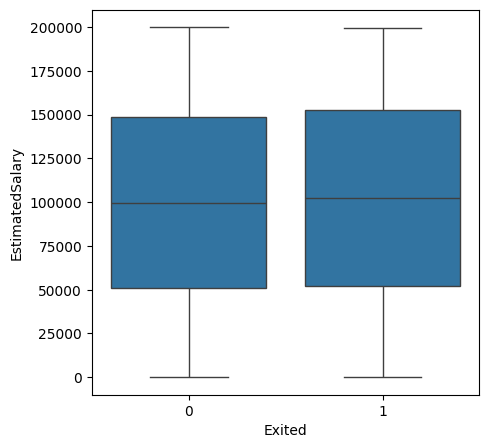

In [ ]:
plt.figure(figsize=(5,5))
sns.boxplot(y='EstimatedSalary',x='Exited',data=ds)
plt.show()

### Observation:
* Distributions are nearly identical.
* Estimated salary does not correlate strongly with churn.

## Data Preprocessing

### Dummy Variable Creation

In [ ]:
# Using the get_dummies function for one-hot encoding. To convert each category in the categorical variable into a new binary column.
ds = pd.get_dummies(ds,columns=ds.select_dtypes(include=["object"]).columns.tolist(),drop_first=True)
ds = ds.astype(float)
ds.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,0.0,0.0,0.0
1,608.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,0.0,1.0,0.0
2,502.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,0.0,0.0,0.0
3,699.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,0.0,0.0
4,850.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,1.0,0.0


In [ ]:
ds.tail()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
9995,771.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0.0,0.0,0.0,1.0
9996,516.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0.0,0.0,0.0,1.0
9997,709.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58,1.0,0.0,0.0,0.0
9998,772.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1.0,1.0,0.0,1.0
9999,792.0,28.0,4.0,130142.79,1.0,1.0,0.0,38190.78,0.0,0.0,0.0,0.0


### Train-validation-test Split

In [ ]:
X = ds.drop(['Exited'],axis=1) # Credit Score through Estimated Salary
y = ds['Exited'] # Exited

### Information:
* Target feature `Exited` dropped.
* Assigned to dependent variable `y`

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_large, X_test, y_large, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42,stratify=y, shuffle = True)



### Information:
* Dataset split into Training and Test set 80:20.

In [ ]:
# Splitting the dataset into the Training and Testing set.

X_train, X_val, y_train, y_val = train_test_split(X_large, y_large, test_size = 0.2, random_state = 42,stratify=y_large, shuffle = True)


In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(6400, 11) (1600, 11) (2000, 11)


### Observation:
* Number of rows in train data = 6400
* Number of rows in validation data = 1600
* Number of rows in test data = 2000
* Number of features = 11
* Making the whole split proportion 64:16:20

In [ ]:
print(y_train.shape, y_val.shape, y_test.shape)

(6400,) (1600,) (2000,)


### Data Normalization

Since all the numerical values are on a different scale, so we will be scaling all the numerical values to bring them to the same scale.

In [ ]:
# creating an instance of the standard scaler
sc = StandardScaler()

X_train[cols_list] = sc.fit_transform(X_train[cols_list])

X_val[cols_list] = sc.transform(X_val[cols_list])
X_test[cols_list] = sc.transform(X_test[cols_list])

In [ ]:
# Checking the dataset after normalization
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3006,0.988678,0.572685,-1.384980,0.610704,1.0,1.0,0.0,1.566070,0.0,0.0,0.0
5735,-0.683985,0.477619,-0.355056,-1.237347,2.0,0.0,1.0,0.036348,0.0,1.0,0.0
5652,0.410474,-0.948376,1.361485,-1.237347,2.0,0.0,0.0,1.745403,0.0,0.0,0.0
26,1.081604,-0.282911,-1.041672,0.962063,1.0,1.0,1.0,1.228816,1.0,0.0,1.0
3596,-0.085130,-0.282911,-1.728288,1.144427,1.0,0.0,0.0,-0.764748,0.0,0.0,1.0


### Information:
* The columns `CreditScore`, `Age`, `Tenure`, `Balance`, and `EstimatedSalary` have been normalized.

## Model Building

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**

* Predicting a customer will stay with the bank, when they are actually planning to churn (False Negative).

* Predicting a customer will churn, when they are actually planning to stay (False Positive).


**Which case is more important?**

While both errors matter, in the context of customer churn prediction, the False Negative is more critical.
If the model fails to identify a customer who is at risk of leaving, the bank misses the opportunity to intervene and retain them. This results in a direct financial loss and possibly damage to brand loyalty.

On the other hand, if a customer is incorrectly predicted to churn (False Positive), the bank may allocate retention resources unnecessarily — a minor operational cost, but far less damaging than losing an actual customer.


**How to reduce this loss i.e., how to reduce False Negatives?**

Since False Negatives are more costly, the bank’s objective will be to maximize Recall — that is, to correctly identify as many actual churners as possible.

* Recall = TP / (TP + FN)

* A high recall means fewer churners are slipping through unnoticed.

We acknowledge that this may lead to some increase in False Positives (lower precision), but in this business scenario, catching more churners is worth the cost of over-alerting.




**Let's create a function for plotting the confusion matrix**



In [ ]:
def make_confusion_matrix(actual_targets, predicted_targets):
    """
    To plot the confusion_matrix with percentages

    actual_targets: actual target (dependent) variable values
    predicted_targets: predicted target (dependent) variable values
    """
    cm = confusion_matrix(actual_targets, predicted_targets)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Let's create two blank dataframes that will store the recall values for all the models we build.

In [ ]:
train_metric_df = pd.DataFrame(columns=["recall"])
valid_metric_df = pd.DataFrame(columns=["recall"])

### Neural Network with SGD Optimizer

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

#### Model 0

In [ ]:
#Initializing the neural network
model_0 = Sequential()
# Adding the input layer with 64 neurons and relu as activation function
model_0.add(Dense(64, activation='relu', input_dim = X_train.shape[1]))
# specifying the # of neurons and the activation function)
model_0.add(Dense(32, activation='relu'))
# code to add the output layer with the number of neurons required.
model_0.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall() # Recall is uncommented
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
## Code to compile the model with binary cross entropy as loss function and recall as the metric.
model_0.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Fitting the ANN

history_0 = model_0.fit(
    X_train, y_train,
    batch_size=64,    ## Code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=30,    ## Code to specify the number of epochs
    verbose=1
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.6460 - recall: 0.1580 - val_loss: 0.6093 - val_recall: 0.0368
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.6071 - recall: 0.0188 - val_loss: 0.5795 - val_recall: 0.0000e+00
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5798 - recall: 0.0020 - val_loss: 0.5581 - val_recall: 0.0000e+00
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5601 - recall: 0.0016 - val_loss: 0.5426 - val_recall: 0.0000e+00
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5458 - recall: 0.0000e+00 - val_loss: 0.5310 - val_recall: 0.0000e+00
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5351 - recall: 0.0000e+00 - val_loss: 0.5224 - val_recall: 0.0000e+00
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.5271 - recall: 0.0000e+00 - val_loss: 0.5158 - val_recall: 0.0000e+00
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5209 - recall: 0.0000e+00 - val_lo

**Loss function**

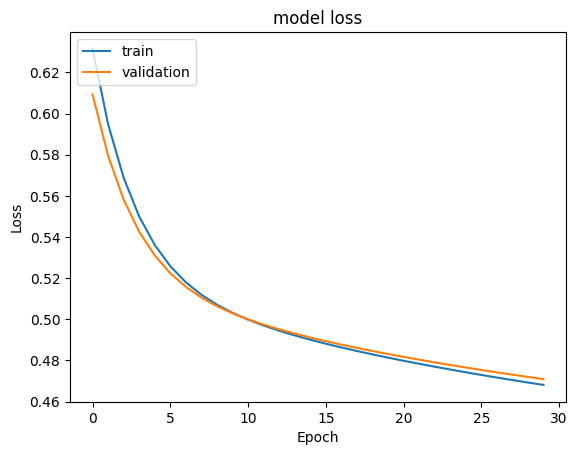

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_0.history['loss'])
plt.plot(history_0.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observation:
* Model 0, a baseline neural network using the SGD optimizer using - Input Features: 11 features (normalized); Input Layer: 64 neurons, ReLU activation; Hidden Layer: 32 neurons, ReLU activation; Output Layer: 1 neuron, Sigmoid activation (for binary classification).

* The training setup - Optimizer: SGD with learning rate = 0.001; Loss Function: Binary Crossentropy; Metric Tracked: Recall; Epochs: 30; Batch Size: 64;

Training output:
* The loss function decreases steadily across epochs on both training and validation sets.
* Loss Curve Interpretation: The training loss starts around 0.62 and drops sharply within the first 3 epochs, then continues to almost stagnate (gradually decrease) until epoch 30. Validation loss closely tracks training loss throughout, no divergence or instability observed.


**Recall**

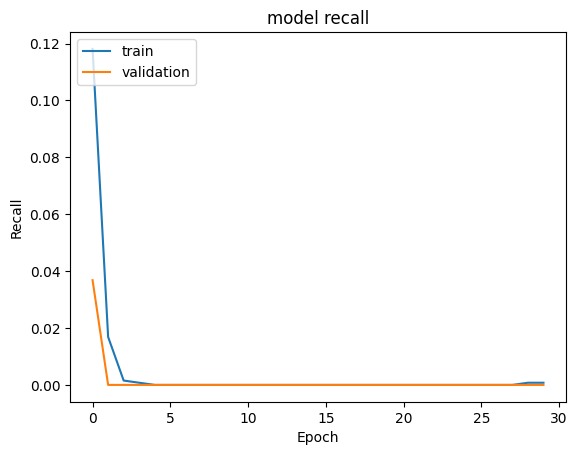

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_0.history['recall'])
plt.plot(history_0.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_0.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Observation:
* This shows it is classifying every customer as "Not Exited" (class 0). Not predicting any churners.
* No true positives are captured. Suggests either the model is underfitting or Class imbalance is overwhelming it

In [ ]:
#Predicting the results using best as a threshold
y_val_pred = model_0.predict(X_val)    ## Code to make prediction on the validation set
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

* Same as above

In [ ]:
model_name = "NN with SGD"

train_metric_df.loc[model_name] = recall_score(y_train, y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val, y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr = classification_report(y_train, y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      5096
         1.0       1.00      0.00      0.00      1304

    accuracy                           0.80      6400
   macro avg       0.90      0.50      0.44      6400
weighted avg       0.84      0.80      0.71      6400



In [ ]:
#classification report
cr=classification_report(y_val, y_val_pred)                      ## Code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1274
         1.0       0.00      0.00      0.00       326

    accuracy                           0.80      1600
   macro avg       0.40      0.50      0.44      1600
weighted avg       0.63      0.80      0.71      1600



**Confusion matrix**

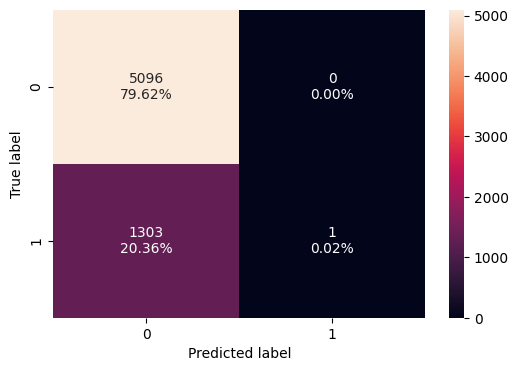

In [ ]:
make_confusion_matrix(y_train, y_train_pred)

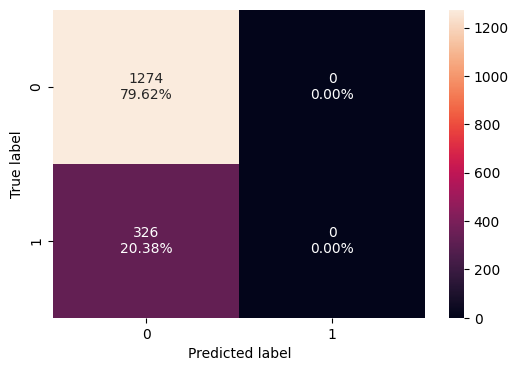

In [ ]:
make_confusion_matrix(y_val, y_val_pred)                             ## Code to check the model's performance on the validation set

### Observation:

* Model predicts nearly all customers as class 0 (non-churn) in both training and validation sets
* The model is not effectively identifying churners (positive class).

* It likely defaults to predicting mostly the majority class (non-churners), most likely due to imbalanced datasets.
* The model is calibrating but not discriminating well between classes.

## Model Performance Improvement

### Neural Network with Adam Optimizer (#### Model 1)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_1 = Sequential()
#Code to add a input layer (specify the # of neurons and activation function)
model_1.add(Dense(64,activation='relu',input_dim = X_train.shape[1]))
#Code to add a hidden layer (specify the # of neurons and activation function)
model_1.add(Dense(32,activation='relu'))
#Code to add a output layer with the required number of neurons and relu as activation function
model_1.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Code to compile the model with binary cross entropy as loss function and recall as the metric
model_1.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_1 = model_1.fit(
    X_train,y_train,
    batch_size=64, ## Code to specify the batch size to use
    validation_data=(X_val,y_val),
    epochs=30, ## Code to specify the number of epochs
    verbose=1
)

Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.5181 - recall: 0.0326 - val_loss: 0.4357 - val_recall: 0.1166
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4230 - recall: 0.2114 - val_loss: 0.4257 - val_recall: 0.2055
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4087 - recall: 0.2939 - val_loss: 0.4183 - val_recall: 0.2270
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3982 - recall: 0.3283 - val_loss: 0.4112 - val_recall: 0.2853
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3889 - recall: 0.3574 - val_loss: 0.4044 - val_recall: 0.3282
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3804 - recall: 0.3792 - val_loss: 0.3988 - val_recall: 0.3313
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3730 - recall: 0.3991 - val_loss: 0.3934 - val_recall: 0.3405
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3663 - recall: 0.4135 - val_loss: 0.3889 - val_recall: 0.3497
Epoch 9/

### Information:
* Keeping the same batch_size and epoch since we are switching optimizers. Helps with reasonable comparison.

**Loss function**

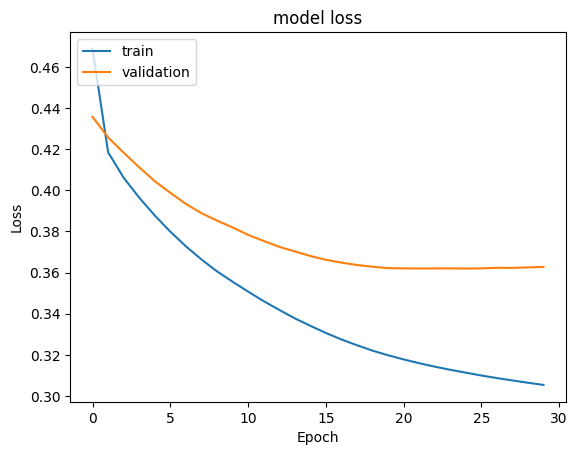

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

**Recall**

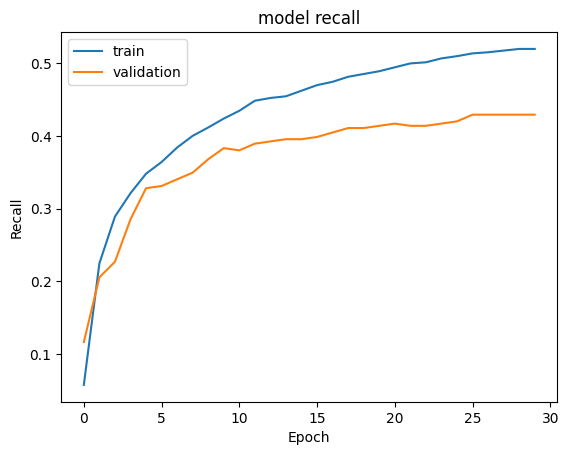

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_1.history['recall'])
plt.plot(history_1.history['val_recall'])
plt.title('model recall')
plt.ylabel('Recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using 0.5 as the threshold
y_train_pred = model_1.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold
y_val_pred = model_1.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [ True]])

In [ ]:
model_name = "NN with Adam"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#lassification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.96      0.93      5096
         1.0       0.79      0.54      0.64      1304

    accuracy                           0.88      6400
   macro avg       0.84      0.75      0.78      6400
weighted avg       0.87      0.88      0.87      6400



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)  ## Code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.73      0.43      0.54       326

    accuracy                           0.85      1600
   macro avg       0.80      0.69      0.73      1600
weighted avg       0.84      0.85      0.84      1600



**Confusion matrix**

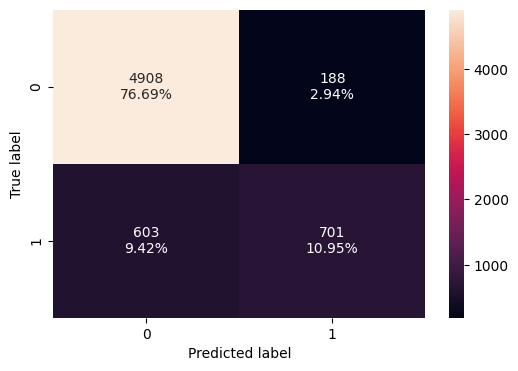

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

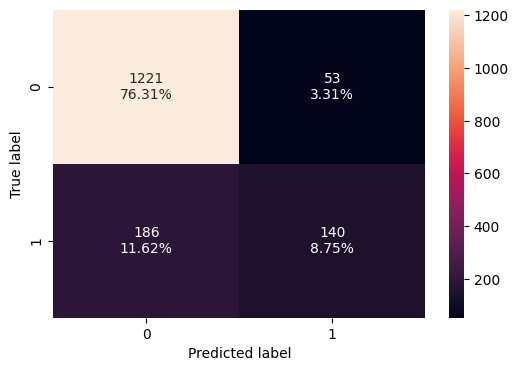

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)                                ## Code to check the model's performance on the validation set

### Observation:
* Model 1 demonstrates significant progress.
* With Adam optimizer and proper training, the network now correctly identifies ~43% of actual churners in the validation set, a strong improvement from Model 0 (recall = 0%).

### Neural Network with Adam Optimizer and Dropout (#### Model 2)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the neural network
model_2 = Sequential()
#Adding the input layer with 32 neurons and relu as activation function
model_2.add(Dense(32,activation='relu',input_dim = X_train.shape[1]))
# Complete the code to add dropout with ratio of 0.2 or any suitable value.
model_2.add(Dropout(0.2))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(64,activation='relu'))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(32,activation='relu'))
# Complete the code to add dropout with ratio of 0.1 or any suitable value.
model_2.add(Dropout(0.1))
# Complete the code to add a hidden layer (specify the # of neurons and the activation function)
model_2.add(Dense(16,activation='relu'))
# Complete the code to add the number of neurons required in the output layer.
model_2.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
## Complete the code to compile the model with binary cross entropy as loss function and recall as the metric.
model_2.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
# Summary of the model
model_2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN with batch_size = 32 and 100 epochs
history_2 = model_2.fit(
    X_train,y_train,
    batch_size=32,  ##Complete the code to specify the batch size.
    epochs=100, ##Complete the code to specify the # of epochs.
    verbose=1,
    validation_data=(X_val,y_val)
)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.4993 - recall: 0.0240 - val_loss: 0.4365 - val_recall: 0.0368
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.4456 - recall: 0.1234 - val_loss: 0.4308 - val_recall: 0.1319
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4302 - recall: 0.2062 - val_loss: 0.4198 - val_recall: 0.2270
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4247 - recall: 0.2812 - val_loss: 0.4123 - val_recall: 0.2699
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4113 - recall: 0.3148 - val_loss: 0.4077 - val_recall: 0.2853
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4108 - recall: 0.3090 - val_loss: 0.4066 - val_recall: 0.2761
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4035 - recall: 0.3291 - val_loss: 0.3992 - val_recall: 0.3037
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3963 - recall: 0.3793 - val_loss: 0.3956 - val_recall: 0.3160


### Information/Observation:
* Training Configuration:
  * Optimizer: Adam (LR = 0.001)
  * Loss Function: Binary Crossentropy
  * Metric Tracked: Recall
  * Epochs: 100
  * Batch Size: 32
* Training loss consistently drops from ~0.49 to ~0.295.

* Validation loss steadily decreases and stabilizes around ~0.34–0.35. No signs of overfitting, likely due to dropout layers
* Model 2 delivers the best recall performance yet, with minimal overfitting, thanks to the use of dropout and slower batch training (batch_size=32).

**Loss function**

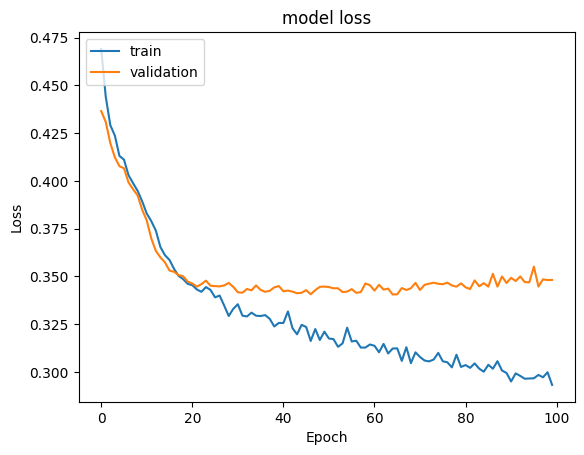

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

From the above plot, we can observe that the train and validation curves are having smooth lines. Reducing the number of neurons and adding dropouts to the model worked,
* Validation loss plateaus around epoch 25 and even begins to slightly increase later.

* This is an early sign of overfitting — not severe, but noticeable.



{and the problem of overfitting was solved.}

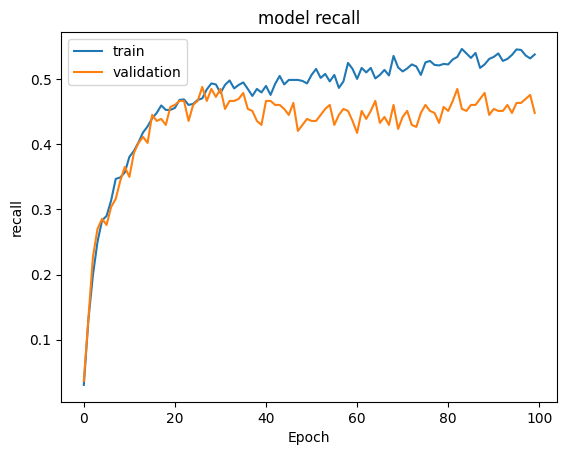

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_2.history['recall'])
plt.plot(history_2.history['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
#Predicting the results using best as a threshold
y_train_pred = model_2.predict(X_train)
y_train_pred = (y_train_pred > 0.5)
y_train_pred

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
#Predicting the results using 0.5 as the threshold.
y_val_pred = model_2.predict(X_val)
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [ ]:
model_name = "NN with Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
#classification report
cr=classification_report(y_train,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93      5096
         1.0       0.85      0.57      0.68      1304

    accuracy                           0.89      6400
   macro avg       0.87      0.77      0.81      6400
weighted avg       0.89      0.89      0.88      6400



In [ ]:
#classification report
cr = classification_report(y_val,y_val_pred) ## Code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91      1274
         1.0       0.75      0.45      0.56       326

    accuracy                           0.86      1600
   macro avg       0.81      0.71      0.74      1600
weighted avg       0.85      0.86      0.84      1600



**Confusion matrix**

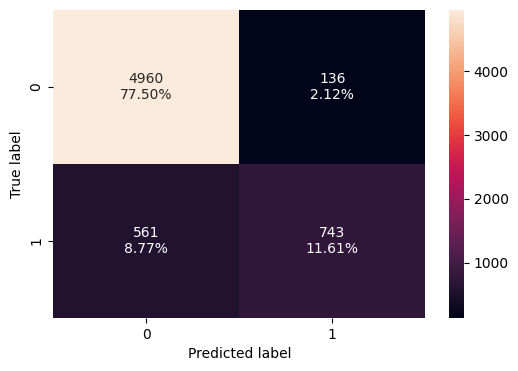

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train, y_train_pred)

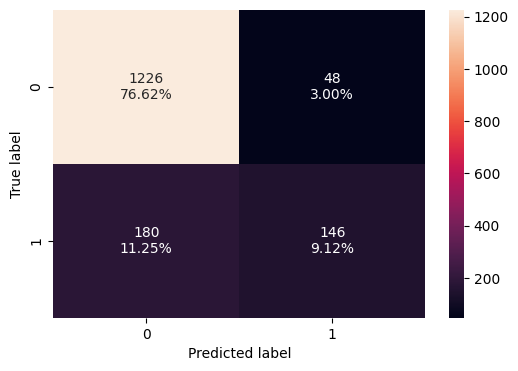

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)                                 ## Code to check the model's performance on the validation set

### Observation:
* Model 2: NN with Adam Optimizer + Dropout, batch_size=32, 100 epochs
* Confusion Matrix Insight
  * Training: TP (Churners correctly predicted): 743, FN (Churners missed): 561, FP (Non-churners wrongly flagged): 136.
  * Validation: TP: 146, FN: 180, FP: 48.
* It is a better-performing model than Models 0 and 1, striking a balance between recall (capturing churners) and precision (minimizing false positives).

* Validation recall of ~45% with an F1-score of ~0.56 means the model is practically usable in real-world churn prediction, and a massive improvement over Model 0’s zero-recall baseline.

### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer (#### Model 3)

**Let's try to apply SMOTE to balance this dataset and then again apply hyperparamter tuning accordingly.**

In [ ]:
sm  = SMOTE(random_state=42)
#Complete the code to fit SMOTE on the training data.
X_train_smote, y_train_smote= sm.fit_resample(X_train,y_train)
print('After UpSampling, the shape of train_X: {}'.format(X_train_smote.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_smote.shape))

After UpSampling, the shape of train_X: (10192, 11)
After UpSampling, the shape of train_y: (10192,) 



Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_3 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_3.add(Dense(32,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(16,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_3.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a sigmoid activation function.
model_3.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use SGD as the optimizer.
optimizer = tf.keras.optimizers.SGD(0.001)

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_3.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_3.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,057 (4.13 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN
history_3 = model_3.fit(
    X_train_smote, y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.7033 - recall: 0.9341 - val_loss: 0.7335 - val_recall: 0.9294
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6998 - recall: 0.9263 - val_loss: 0.7242 - val_recall: 0.9202
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6970 - recall: 0.9182 - val_loss: 0.7162 - val_recall: 0.9080
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6945 - recall: 0.8908 - val_loss: 0.7086 - val_recall: 0.8773
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6920 - recall: 0.8473 - val_loss: 0.7003 - val_recall: 0.8160
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.6889 - recall: 0.7740 - val_loss: 0.6898 - val_recall: 0.7515
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6847 - recall: 0.7132 - val_loss: 0.6788 - val_recall: 0.6933
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6803 - recall: 0.6674 - val_loss: 0.6690 - val_recall: 0.6656


### Information/Observation:
* Model 3: Neural Network with SMOTE, SGD (lr=0.001), batch size = 32, 100 epochs
  
* Huge recall jump early on (Epochs 1–10) due to SMOTE — the model quickly learns to recognize both classes.

* Training recall peaks at ~0.738 by epoch 100.

* Validation recall stabilizes around 0.705 by epoch 50, plateauing in the second half of training.

* Model shows no overfitting — recall and loss curves for train/validation remain tightly aligned.

* This model outperforms all previous models in terms of raw recall.

**Loss function**

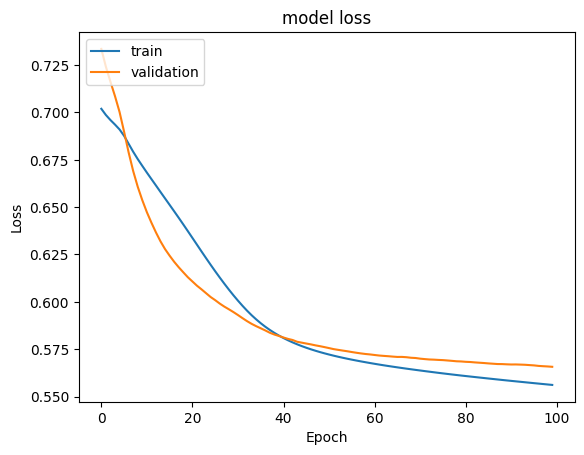

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observation:
* Both training and validation loss decrease consistently throughout the 100 epochs.

* Validation loss closely tracks training loss with no significant gap, indicating:

  * Stable learning

  * No overfitting
* The model is well-regularized and trained properly on the SMOTE-balanced dataset using SGD. The training process is efficient and generalizes well.

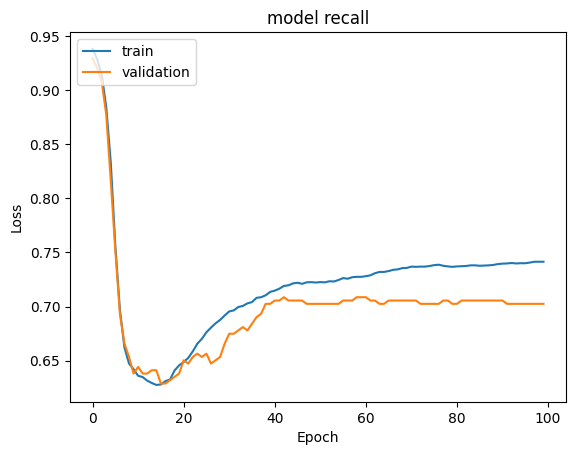

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_3.history['recall'])
plt.plot(history_3.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observation:
* Training recall starts high (~0.93) due to class balancing from SMOTE, but then dips slightly before stabilizing and rising to ~0.738.

* Validation recall stabilizes around 0.705 from epoch 40 onward, confirming:

  * The model is consistently identifying over 70% of churners (true positives).

  * Generalization to unseen data is strong.

* A brief dip in recall (epochs ~10–20) reflects the model adjusting to avoid false positives after early over-confidence.

* The model achieves the best recall performance to date, sustaining ~70.5% validation recall, with excellent training stability and generalization.
* Model 3 delivers the most reliable recall yet, achieving over 70% recall on validation data with no overfitting or instability.
The SMOTE-balanced dataset and use of SGD with a simple, regularized architecture proved highly effective in maximizing true churner detection.

In [ ]:
y_train_pred = model_3.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_3.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[False],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & SGD"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.73      0.71      0.72      5096
         1.0       0.72      0.74      0.73      5096

    accuracy                           0.73     10192
   macro avg       0.73      0.73      0.73     10192
weighted avg       0.73      0.73      0.73     10192



In [ ]:
cr=classification_report(y_val,y_val_pred)                      ## Code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.90      0.71      0.79      1274
         1.0       0.38      0.70      0.49       326

    accuracy                           0.70      1600
   macro avg       0.64      0.70      0.64      1600
weighted avg       0.80      0.70      0.73      1600



**Confusion matrix**

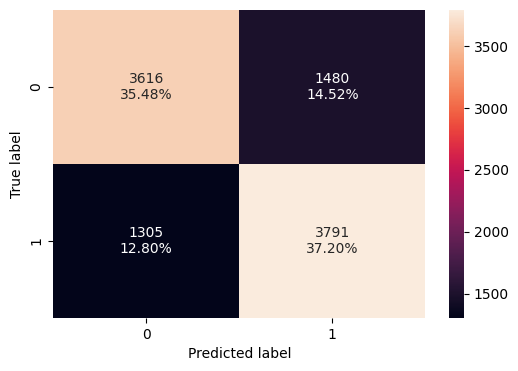

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

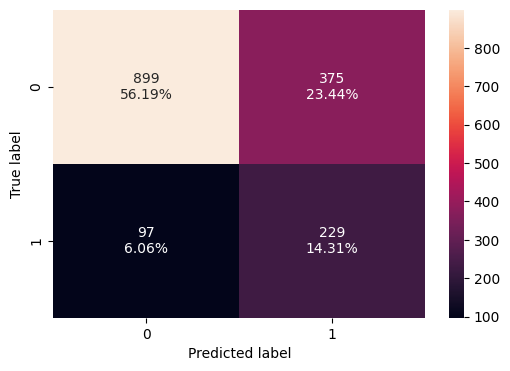

In [ ]:
#Calculating the confusion matrix

make_confusion_matrix(y_val,y_val_pred)                                 ## Code to check the model's performance on the validation set

### Observation:
* Training Performance is well-balanced due to SMOTE:

  * Precision and recall are nearly equal (both ~0.73) across both classes.

  * This shows SMOTE allowed the model to learn class 1 equally well.

* Validation Performance reflects real-world conditions:

  * Recall for churners (class 1) is strong at 70%

  * Precision is lower (38%) — meaning more false positives, but recall remains the priority.

  * High recall with moderate precision is ideal in churn cases where missing a churner is costlier than flagging a loyal customer.

* Model 3 achieves the best recall performance than the previous models. With SMOTE balancing, SGD, and a compact architecture, it consistently identifies ~70% of churners in the validation set.
Despite a trade-off in precision, this model aligns with the business goal.

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer (#### Model 4)

Let's build a model with the balanced dataset

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_4 = Sequential()
#Complete the code to add a input layer (specify the # of neurons and activation function)
model_4.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(32,activation='relu'))
#Complete the code to add a hidden layer (specify the # of neurons and activation function)
model_4.add(Dense(16,activation='relu'))
# Complete the code to add the required number of neurons in the output layer and a suitable activation function.
model_4.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_4.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_4.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,393 (13.25 KB)

 Trainable params: 3,393 (13.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Fitting the ANN

history_4 = model_4.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100,  ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val)
)

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.6123 - recall: 0.6891 - val_loss: 0.5649 - val_recall: 0.6994
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5147 - recall: 0.7401 - val_loss: 0.5564 - val_recall: 0.7393
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4755 - recall: 0.7653 - val_loss: 0.5472 - val_recall: 0.7669
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4522 - recall: 0.7826 - val_loss: 0.5400 - val_recall: 0.7699
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4345 - recall: 0.7932 - val_loss: 0.5279 - val_recall: 0.7546
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4186 - recall: 0.8057 - val_loss: 0.5226 - val_recall: 0.7515
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4052 - recall: 0.8153 - val_loss: 0.5180 - val_recall: 0.7485
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3931 - recall: 0.8168 - val_loss: 0.5192 - val_recall: 0.7423


### Observation:
* While Model 4 initially achieved the highest recall, it suffered from clear overfitting by epoch 20–30. The training recall continued improving, but validation recall degraded.
* We will regularize by adding dropouts.

**Loss function**

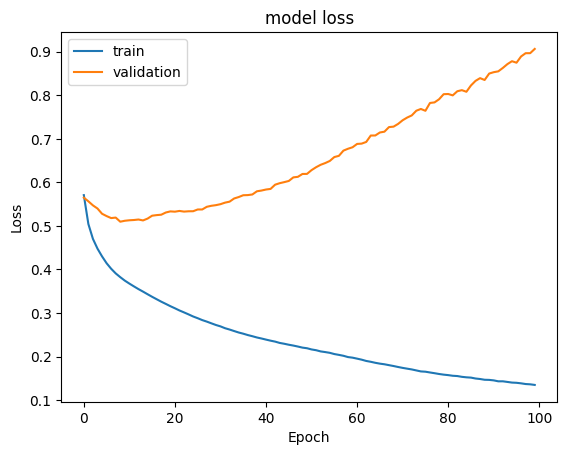

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observation:
* Training Loss decreases smoothly and steadily across 100 epochs, dropping below 0.15

* Validation Loss, however, increases steadily after ~epoch 10

* It is clearly overfitting — the model continues to improve on the training set but deteriorates on unseen validation data

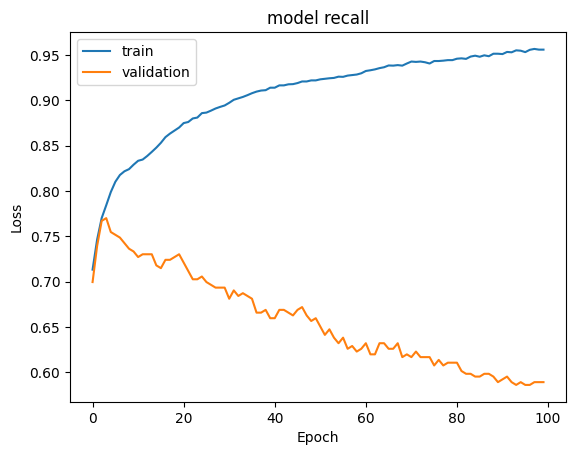

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_4.history['recall'])
plt.plot(history_4.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observation:
* Training Recall rises rapidly and peaks at ~96%

* Validation Recall peaks early (~epoch 3 at ~77%) and then declines to ~58%
* While training recall is impressive, the decreasing validation recall indicates the model is losing its ability to detect actual churners outside the training set.

In [ ]:
y_train_pred = model_4.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_4.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE & Adam"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      5096
         1.0       0.91      0.98      0.94      5096

    accuracy                           0.94     10192
   macro avg       0.94      0.94      0.94     10192
weighted avg       0.94      0.94      0.94     10192



In [ ]:
cr=classification_report(y_val,y_val_pred)                             ## Code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85      1274
         1.0       0.45      0.59      0.51       326

    accuracy                           0.77      1600
   macro avg       0.67      0.70      0.68      1600
weighted avg       0.80      0.77      0.78      1600



**Confusion matrix**

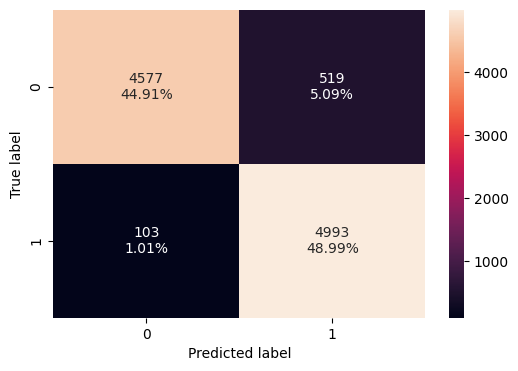

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

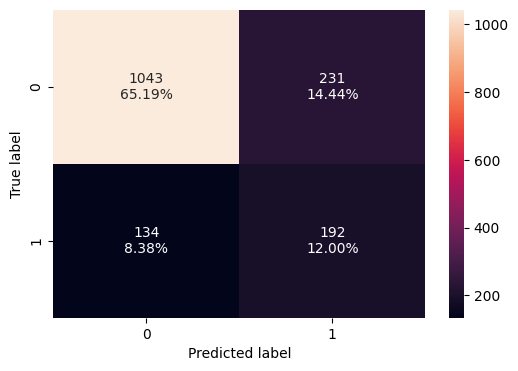

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)                                      ## Code to check the model's performance on the validation set

### Observation:
* Model 4 achieves outstanding training performance, but due to lack of regularization, it begins to overfit, leading to a drop in validation recall from ~74% to 59%.
* While this is better than baseline, it underperforms compared to Model 3, which maintained 70.5% validation recall with less overfitting.
* raining metrics are near-perfect, but this is expected with SMOTE and no regularization.

* Overfitting confirmed: Validation recall drops after epoch 10–20 and stays below peak.

* Precision on validation set is only 0.45 for churners — which means ~55% of flagged customers are not actual churners.

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout (#### Model 5)

In [ ]:
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(2)
random.seed(2)
tf.random.set_seed(2)

In [ ]:
#Initializing the model
model_5 = Sequential()
# Complete the code to add required # of neurons to the input layer with relu as activation function
model_5.add(Dense(64,activation='relu',input_dim = X_train_smote.shape[1]))
#Complete the code to add dropout rate
model_5.add(Dropout(0.3))
# Complete the code to add required # neurons to the hidden layer with any activation function.
model_5.add(Dense(32,activation='relu'))
# Complete the code to add dropout rate.
model_5.add(Dropout(0.2))
# Adding hidden layer with 8 neurons with relu as activation function
model_5.add(Dense(8,activation='relu'))
# Complete the code to add the required number of neurons in the output layer with a suitable activation function.
model_5.add(Dense(1, activation = 'sigmoid'))

In [ ]:
#Complete the code to use Adam as the optimizer.
optimizer = tf.keras.optimizers.Adam()

# uncomment one of the following lines to define the metric to be used
# metric = 'accuracy'
metric = keras.metrics.Recall()
# metric = keras.metrics.Precision()
# metric = keras.metrics.F1Score()

In [ ]:
# Complete the code to compile the model with binary cross entropy as loss function and recall as the metric
model_5.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=[metric])

In [ ]:
model_5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,121 (12.19 KB)

 Trainable params: 3,121 (12.19 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_5 = model_5.fit(
    X_train_smote,y_train_smote,
    batch_size=32, ## Complete the code to specify the batch size to use
    epochs=100, ## Complete the code to specify the number of epochs
    verbose=1,
    validation_data = (X_val,y_val))

Epoch 1/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.6489 - recall: 0.6086 - val_loss: 0.5627 - val_recall: 0.6748
Epoch 2/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5772 - recall: 0.6957 - val_loss: 0.5548 - val_recall: 0.6687
Epoch 3/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5587 - recall: 0.7151 - val_loss: 0.5574 - val_recall: 0.6718
Epoch 4/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5423 - recall: 0.7208 - val_loss: 0.5371 - val_recall: 0.6748
Epoch 5/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5248 - recall: 0.7273 - val_loss: 0.5254 - val_recall: 0.6748
Epoch 6/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5179 - recall: 0.7324 - val_loss: 0.5138 - val_recall: 0.6748
Epoch 7/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5072 - recall: 0.7309 - val_loss: 0.5172 - val_recall: 0.7086
Epoch 8/100
319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4993 - recall: 0.7480 - val_loss: 0.5180 - val_recall: 0.7117


### Observation:
* Model 5: SMOTE-balanced Data + Adam Optimizer + Dropout Regularization
* The model strikes a solid balance between learning capacity and generalization. Dropout regularization successfully reduces overfitting, resulting in a stable validation recall between 68–72%.
* While it didn’t outperform Model 3 in raw recall (70.5%), it delivers more consistent performance and cleaner training dynamics than Model 4.

**Loss function**

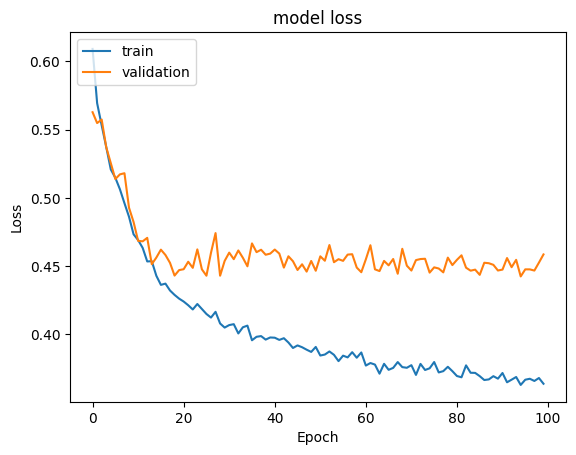

In [ ]:
#Plotting Train Loss vs Validation Loss
plt.plot(history_5.history['loss'])
plt.plot(history_5.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observation:
* Training Loss consistently decreases, reaching ~0.36 by epoch 100.

* Validation Loss drops early (~epoch 10), then flattens and stabilizes between 0.44–0.46 from epoch 20 onward.

* Minimal divergence between train and validation curves — this shows:

  * Regularization helped prevent overfitting. Better generalization compared to Model 4

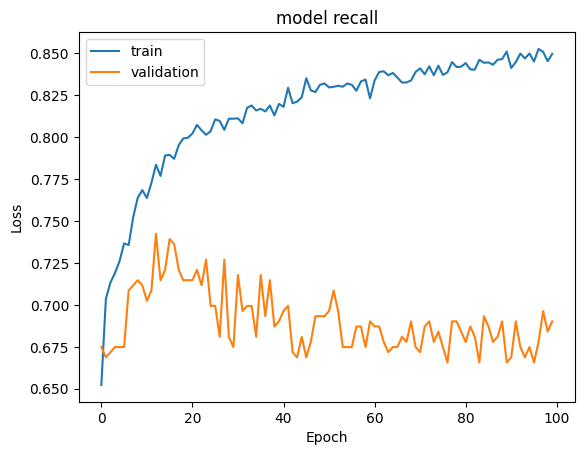

In [ ]:
#Plotting Train recall vs Validation recall
plt.plot(history_5.history['recall'])
plt.plot(history_5.history['val_recall'])
plt.title('model recall')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### Observation:
* Training Recall rises to ~0.85

* Validation Recall peaks early (~0.74) around epochs 10–15 and fluctuates between 0.66–0.72 after that

* Dropout has prevented degradation seen in Model 4, keeping performance steady even in later epochs

In [ ]:
y_train_pred = model_5.predict(X_train_smote)
#Predicting the results using 0.5 as the threshold
y_train_pred = (y_train_pred > 0.5)
y_train_pred

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
y_val_pred = model_5.predict(X_val)
#Predicting the results using 0.5 as the threshold
y_val_pred = (y_val_pred > 0.5)
y_val_pred

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[ True],
       [False],
       [False],
       ...,
       [False],
       [ True],
       [ True]])

In [ ]:
model_name = "NN with SMOTE,Adam & Dropout"

train_metric_df.loc[model_name] = recall_score(y_train_smote,y_train_pred)
valid_metric_df.loc[model_name] = recall_score(y_val,y_val_pred)

**Classification report**

In [ ]:
cr=classification_report(y_train_smote,y_train_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.89      0.84      0.86      5096
         1.0       0.85      0.89      0.87      5096

    accuracy                           0.87     10192
   macro avg       0.87      0.87      0.87     10192
weighted avg       0.87      0.87      0.87     10192



In [ ]:
#classification report
cr=classification_report(y_val,y_val_pred)                 ## Code to check the model's performance on the validation set
print(cr)

              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86      1274
         1.0       0.49      0.69      0.57       326

    accuracy                           0.79      1600
   macro avg       0.70      0.75      0.72      1600
weighted avg       0.83      0.79      0.80      1600



### Observation:
* Validation Recall	69%.	Near-peak for this task (Model 3 was ~70.5%)
* Validation Precision	49%.	Acceptable trade-off for high recall
* Overfitting Risk is	Minimal.	Dropout helped stabilize generalization
* Validation Accuracy	79%.	Balanced classification power overall

**Confusion matrix**

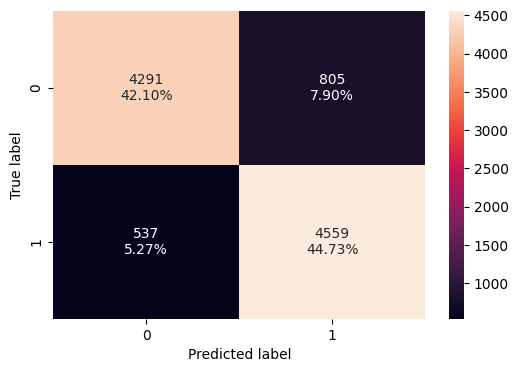

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_train_smote, y_train_pred)

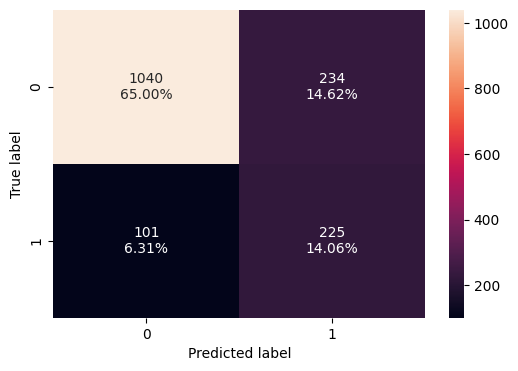

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_val,y_val_pred)                               ## Code to check the model's performance on the validation set

### Observation:
* Model 5 is the most balanced model in the lineup.
* With dropout regularization, it achieves near-peak recall (69%) on real-world data and significantly reduces overfitting compared to Model 4.
* It retains a high training recall (89%) while generalizing better than Model 4 and matching Model 3 in performance — but with greater robustness.

## Model Performance Comparison and Final Model Selection

In [ ]:
print("Training performance comparison")
train_metric_df

Training performance comparison


,recall
NN with SGD,0.000767
NN with Adam,0.537577
NN with Adam & Dropout,0.569785
NN with SMOTE & SGD,0.743917
NN with SMOTE & Adam,0.979788
"NN with SMOTE,Adam & Dropout",0.894623


In [ ]:
print("Validation set performance comparison")
valid_metric_df

Validation set performance comparison


,recall
NN with SGD,0.000000
NN with Adam,0.429448
NN with Adam & Dropout,0.447853
NN with SMOTE & SGD,0.702454
NN with SMOTE & Adam,0.588957
"NN with SMOTE,Adam & Dropout",0.690184


In [ ]:
train_metric_df - valid_metric_df

,recall
NN with SGD,0.000767
NN with Adam,0.108129
NN with Adam & Dropout,0.121933
NN with SMOTE & SGD,0.041463
NN with SMOTE & Adam,0.390831
"NN with SMOTE,Adam & Dropout",0.204439


In [ ]:
train_valid_diff = [train_metric_df - valid_metric_df]
print(train_valid_diff)

[                                recall
NN with SGD                   0.000767
NN with Adam                  0.108129
NN with Adam & Dropout        0.121933
NN with SMOTE & SGD           0.041463
NN with SMOTE & Adam          0.390831
NN with SMOTE,Adam & Dropout  0.204439]


In [ ]:
train_recall = train_metric_df.rename(columns={"recall": "Train_Recall"})
valid_recall = valid_metric_df.rename(columns={"recall": "Validation_Recall"})
recall_diff = (train_metric_df - valid_metric_df).rename(columns={"recall": "Recall_Difference"})

pd.concat([train_recall, valid_recall, recall_diff], axis=1)

,Train_Recall,Validation_Recall,Recall_Difference
NN with SGD,0.000767,0.000000,0.000767
NN with Adam,0.537577,0.429448,0.108129
NN with Adam & Dropout,0.569785,0.447853,0.121933
NN with SMOTE & SGD,0.743917,0.702454,0.041463
NN with SMOTE & Adam,0.979788,0.588957,0.390831
"NN with SMOTE,Adam & Dropout",0.894623,0.690184,0.204439


In [ ]:
pd.concat([train_metric_df, valid_metric_df, train_metric_df - valid_metric_df], axis=1)

,recall,recall,recall
NN with SGD,0.000767,0.000000,0.000767
NN with Adam,0.537577,0.429448,0.108129
NN with Adam & Dropout,0.569785,0.447853,0.121933
NN with SMOTE & SGD,0.743917,0.702454,0.041463
NN with SMOTE & Adam,0.979788,0.588957,0.390831
"NN with SMOTE,Adam & Dropout",0.894623,0.690184,0.204439


### Observation:
* Training Comparison: Observation: SMOTE dramatically improved training recall across all models, with Model 4 achieving near-perfect recall.
* Validation Comparison:
  * Model 3 (SMOTE + SGD) has the highest validation recall (0.7025).

  * Model 5 (SMOTE + Adam + Dropout) follows closely (0.6902), with less overfitting.

* Train - Validation recall (Overfitting measure):
  * Model 3 has the smallest gap, suggesting good generalization.
  * Model 4 severely overfits.
  * Model 5 strikes a balanced trade-off between recall and generalization

* Model 3 (SMOTE + SGD) will be selected for the test data prediction. It has Best validation recall (0.7025) + lowest overfit gap (0.04)

In [ ]:
y_test_pred = model_3.predict(X_test)    ## Code to specify the best model
y_test_pred = (y_test_pred > 0.5)
print(y_test_pred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
[[False]
 [False]
 [False]
 ...
 [ True]
 [False]
 [False]]


In [ ]:
#print classification report
cr=classification_report(y_test,y_test_pred)
print(cr)

              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80      1593
         1.0       0.40      0.75      0.52       407

    accuracy                           0.72      2000
   macro avg       0.66      0.73      0.66      2000
weighted avg       0.81      0.72      0.74      2000



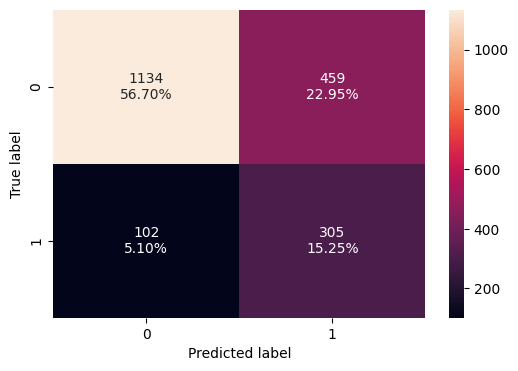

In [ ]:
#Calculating the confusion matrix
make_confusion_matrix(y_test,y_test_pred)

## Actionable Insights and Business Recommendations

### Insights:
* Model 3 (Neural Network with SMOTE and SGD) was selected. It generalized well.
* Though there is high false positives ~23% (459), which will cause false alarms. False Negatives is at ~5% (102), which is the business goal. This will help catch churners early. This is evident in 305 actual churners correctly identified.
* Generalization held steady: test recall (75%) matches validation (70.25%)
* Best balance between sensitivity and overfit control


### Recommendation:
* Marketing efforts should be directed to address the identified likely churners.
- Management may want to direct some resources to Germany. Conduct region-specific satisfaction surveys and assess if there are fewer local branches or ATMs, Language/cultural support gaps,  Lower NPS (Net Promoter Score).
- High balance customers may feel under-engaged. Offer personalized financial advice, wealth management check-ins, or better interest products.
- Inactive members are more likely to churn. Promote digital banking usage and offer app-based incentives.
- Customers with only 1 product have low switching costs. Encourage bundling (e.g., combine checking + savings + credit card). Educate customers about the range of products.
- Offer products catering to customers over 55 years e.g a retirement offering.
- Embed the prediction model into the CRM systems. Score customers monthly, trigger retention campaigns or alerts to account managers